<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Time_Series_using_Prophet_for_Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to video explaining the code - https://www.youtube.com/watch?v=XZhPO043lqU

In [ ]:
!pip install fbprophet

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [ ]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [ ]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [ ]:
fig = px.line(df, x='timeStamp', y='demand', hover_data=['temp'], title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
ny_df=df.set_index('timeStamp')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fed37d048>,
      dtype=object)

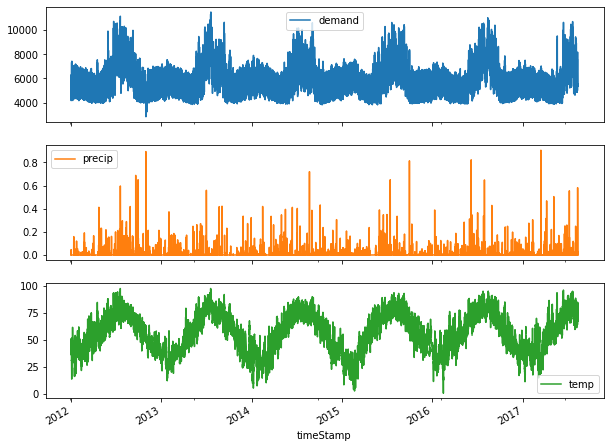

In [ ]:
ny_df.plot(subplots=True)

In [ ]:
ny_df.resample('D').mean()

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2017-08-08,6471.626042,0.000000,71.039167
2017-08-09,6811.112167,0.047529,73.852500
2017-08-10,5582.297000,0.002033,75.217500


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9feca11cf8>,
      dtype=object)

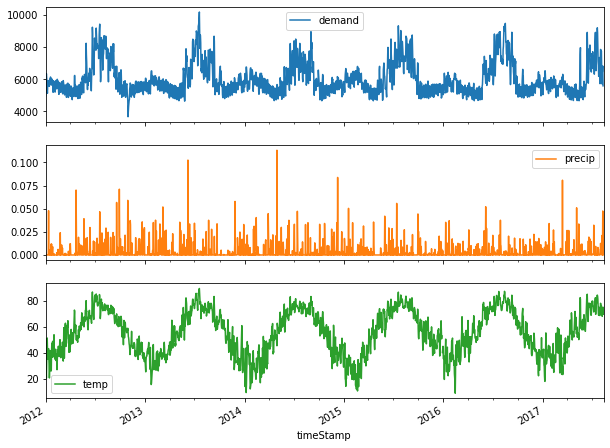

In [ ]:
ny_df.resample('D').mean().plot(subplots=True)

In [ ]:
ny_df_daily=ny_df.resample('D').mean()

In [ ]:
from fbprophet import Prophet

In [ ]:
ny_df_daily

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2017-08-08,6471.626042,0.000000,71.039167
2017-08-09,6811.112167,0.047529,73.852500
2017-08-10,5582.297000,0.002033,75.217500


In [ ]:
ny_df_final=ny_df_daily.reset_index()[['timeStamp','demand','temp']].rename({'timeStamp':'ds','demand':'y','temp':'temp'}, axis='columns')

In [ ]:
ny_df_final

,ds,y,temp
0,2012-01-01,4954.833333,46.510000
1,2012-01-02,5302.954167,40.496667
2,2012-01-03,6095.512500,26.672500
3,2012-01-04,6336.266667,20.585000
4,2012-01-05,6130.245833,33.577500
...,...,...,...
2046,2017-08-08,6471.626042,71.039167
2047,2017-08-09,6811.112167,73.852500
2048,2017-08-10,5582.297000,75.217500
2049,2017-08-11,NaN,72.767917


In [ ]:
ny_df_final.query('temp != temp')

,ds,y,temp
1457,2015-12-28,5510.776333,NaN


In [ ]:
ny_df_final['temp']=ny_df_final['temp'].fillna(method='ffill')

Previous model fit with Univariate demand data

![alt text](http://drive.google.com/uc?export=view&id=1ucmj_y2-5SuNjIpR89Rg6vrM0j6979wB)

In [ ]:
ny_df_final['month']=ny_df_final['ds'].dt.month

In [ ]:
ny_df_final.head()

In [ ]:
fig = px.line(ny_df_final, x='ds', y='y', hover_data=['temp','month'], title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
ny_df_final[['month','temp']].groupby('month').agg({'temp':{'max','min','mean'}})

In [ ]:
ny_df_final[['y','temp']].corr()

In [ ]:
ny_df_final.query('temp > 80')[['y','temp']].corr()

In [ ]:
ny_df_final.query('temp <= 80')[['y','temp']].corr()

In [ ]:
def summer_temp(temp):
  if temp > 80:
    return 1
  else:
    return 0

In [ ]:
ny_df_final['summer_temp']=ny_df_final['temp'].apply(summer_temp)

In [ ]:
ny_df_final['month_bins']=pd.cut(ny_df_final['month'],bins=3, labels=False)

In [ ]:
ny_df_final

In [ ]:
train=ny_df_final[(ny_df_final['ds'] >= '2012-01-01') & (ny_df_final['ds'] <= '2017-04-30')]
test=ny_df_final[(ny_df_final['ds'] > '2017-04-30')]

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
test

In [ ]:
m = Prophet(interval_width=0.95,yearly_seasonality=True)

In [ ]:
m.add_regressor('summer_temp',standardize=False)
m.add_regressor('month_bins',standardize=False,mode='multiplicative')

In [ ]:
m.fit(train)

In [ ]:
m.params

In [ ]:
future = m.make_future_dataframe(periods=104)
future.tail()

In [ ]:
future['summer_temp'] = ny_df_final['summer_temp']

In [ ]:
future['month_bins'] = ny_df_final['month_bins']

In [ ]:
future

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
fig1 = m.plot(forecast)

================================================================================

Previous model fit with Univariate demand data

![alt text](http://drive.google.com/uc?export=view&id=1ucmj_y2-5SuNjIpR89Rg6vrM0j6979wB)

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from fbprophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '731 days', horizon = '365 days')
df_p = performance_metrics(cv_results)
df_p

Previous MAPE - 0.06 to 0.08

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='mape')